### Importing required packages

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [37]:
df1 = pd.read_csv('train/train.csv')
print(df1.shape)

(116058, 29)


### Correlation Matrix with Heatmap

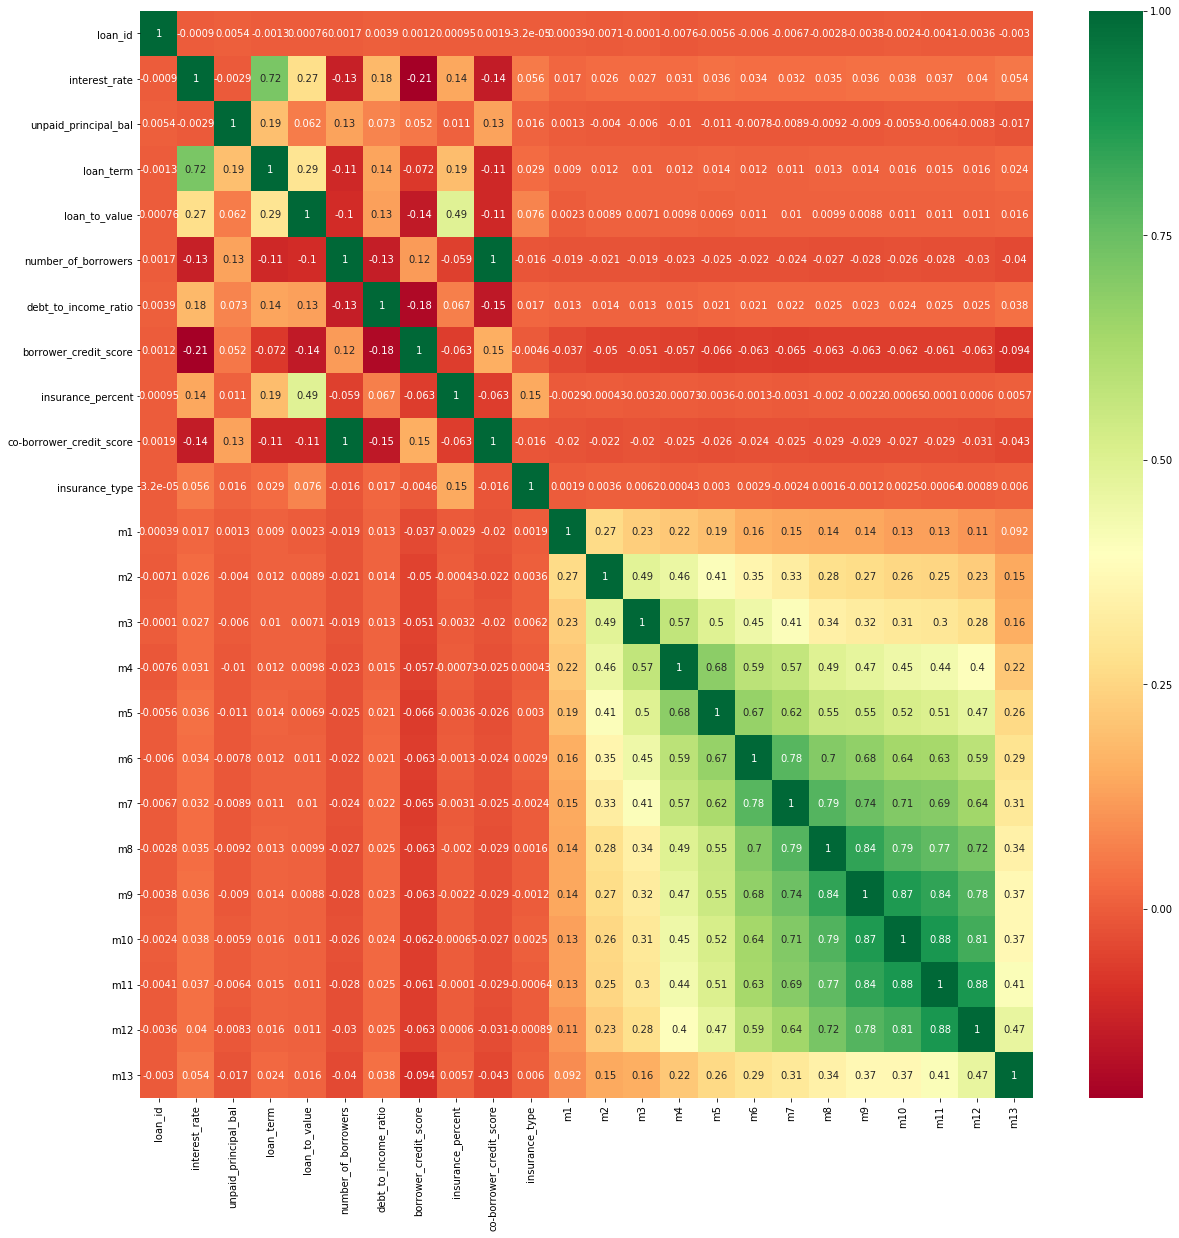

In [38]:
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

- Reading the train file
- Dropping unwanted features
- Converting categorical features to numbers


In [39]:
df_1 = df1.drop(['loan_id','origination_date','first_payment_date','insurance_type'], axis=1)
print(df_1.shape)
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

df_1.financial_institution = le1.fit_transform(df_1.financial_institution)
df_1.source = le1.fit_transform(df_1.source)
df_1.number_of_borrowers = le1.fit_transform(df_1.number_of_borrowers)
df_1.loan_purpose = le1.fit_transform(df_1.loan_purpose)
df_1.head()

(116058, 25)


,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,2,18,4.250,214000,360,95,0,22.0,694.0,2,...,0,0,0,1,0,0,0,0,0,1
1,1,15,4.875,144000,360,72,0,44.0,697.0,1,...,0,0,0,0,0,0,0,1,0,1
2,2,17,3.250,366000,180,49,0,33.0,780.0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,8,4.750,135000,360,46,1,44.0,633.0,1,...,0,0,0,0,0,1,1,1,1,1
4,0,8,4.750,124000,360,80,0,43.0,681.0,2,...,3,4,5,6,7,8,9,10,11,1


- Reading the test file
- Dropping unwanted features
- Converting categorical features to numbers

In [40]:
df2 = pd.read_csv('test/test.csv')
print(df2.shape)
df_2 = df2.drop(['loan_id','origination_date','first_payment_date','insurance_type'], axis=1)
print(df_2.shape)
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()

df_2.financial_institution = le1.fit_transform(df_2.financial_institution)
df_2.source = le1.fit_transform(df_2.source)
df_2.number_of_borrowers = le1.fit_transform(df_2.number_of_borrowers)
df_2.loan_purpose = le1.fit_transform(df_2.loan_purpose)
df_2.head()

(35866, 28)
(35866, 24)


,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,1,3.875,417000,360,75,0,20,790,0,...,0,0,0,0,0,0,0,0,0,0
1,0,8,4.500,113000,360,80,1,33,793,2,...,0,0,0,0,0,0,0,0,0,0
2,1,8,4.500,72000,360,75,0,34,710,2,...,0,0,0,0,0,0,0,0,0,0
3,0,6,4.125,123000,180,41,1,24,798,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,3.250,166000,180,53,1,12,767,0,...,0,0,0,0,0,0,0,0,0,0


### finding statistical features for the train set and appending columnwise

In [41]:
train_x = df_1.iloc[:,12:24]
statistical_x = train_x.values
train_y = df_1.m13.values

train_x['max'] = np.max(statistical_x,axis=1)
train_x['min'] = np.min(statistical_x,axis=1)
train_x['mean'] = np.mean(statistical_x,axis=1)
train_x['non_del_months'] = np.count_nonzero(statistical_x,axis=1)
train_x['variance'] = np.var(statistical_x,axis=1)
train_x['skewness'] = stats.skew(statistical_x,axis=1)
train_x['kurt'] = stats.kurtosis(statistical_x,axis=1)
train_x.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,max,min,mean,non_del_months,variance,skewness,kurt
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.083333,1,0.076389,3.015113,7.090909
1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.083333,1,0.076389,3.015113,7.090909
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,-3.000000
3,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0.333333,4,0.222222,0.707107,-1.500000
4,0,1,2,3,4,5,6,7,8,9,10,11,11,0,5.500000,11,11.916667,0.000000,-1.216783


### finding statistical features for the test set and appending columnwise

In [42]:
test_x = df_2.iloc[:,12:]
statistical_y = test_x.values

test_x['max'] = np.max(statistical_y,axis=1)
test_x['min'] = np.min(statistical_y,axis=1)
test_x['mean'] = np.mean(statistical_y,axis=1)
test_x['non_del_months'] = np.count_nonzero(statistical_y,axis=1)
test_x['variance'] = np.var(statistical_y,axis=1)
test_x['skewness'] = stats.skew(statistical_y,axis=1)
test_x['kurt'] = stats.kurtosis(statistical_y,axis=1)
test_x.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,max,min,mean,non_del_months,variance,skewness,kurt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,-3.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,-3.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,-3.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,-3.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,-3.0


### Splitting the train set features to train and validation with validation size = 33%

In [43]:
X=np.array(train_x)
Y=np.array(train_y)
X_test= np.array(test_x)

X_train , X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size=0.33,random_state=1,shuffle=True,stratify=Y)

print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)

(77758, 19)
(77758,)
(38300, 19)
(38300,)
(35866, 19)


### Scaling the train,validation and test set

In [44]:
scaler = StandardScaler()
x_train = scaler.fit(X_train).transform(X_train)
x_valid = scaler.fit(X_valid).transform(X_valid)
x_test = scaler.fit(X_test).transform(X_test)

### importing the Randomforest Regression model and fitting and predicting the data using this model

In [45]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300, random_state =0) 
#model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### predicting the fitted model using validation data

In [46]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model_score = model.score(x_train,Y_train)
print('coefficient of determination R^2 of the prediction.: ',model_score)
y_predicted = model.predict(x_valid)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_valid, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_valid, y_predicted))
print('mean_absolute_error: %.2f' % mean_absolute_error(Y_valid, y_predicted))

coefficient of determination R^2 of the prediction.:  0.42803077267705736
Mean squared error: 0.00
Test Variance score: 0.39
mean_absolute_error: 0.01


### predicting the test set using the trained model

In [47]:
y_pred = model.predict(x_test)
y_pred[y_pred>=0.25] = 1
y_pred[y_pred<0.25] = 0

sub = pd.read_csv('sample_submission/sample_submission.csv')
sub['m13'] = y_pred 
sub.to_csv('submission.csv',index=False) 
sub.head()

,loan_id,m13
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
